In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
from Data_preparation import load_fish_data

In [3]:
df = load_fish_data("../Data/Raw/Main_Data.xlsx", sheet_name="Data edited")
pd.set_option('display.max_columns', None)

# What does the dataset look like?


In [4]:

df.head()

,Date,Juilin Date,Month,Day,Year,row,Week,AM Feed,AM Transparency,PM Feed,PM Transparency,Stocked,Spring Temp (F),Max Spring (F),Min Spring (F),Daily turbi mean,Max daily turbi,Max air temp,Min air temp,Dec Rain,Calmar Rain,Year class,Strain,Lot,Sub Lot,Raceway,# fish,Morts,Fish Alive,Fish survival rate,Sub Lot % morts,Lot % mort,Strain % mort,Comments
0,2022-04-22,44673,4,22,2022,477,17,Y,5.450833,X,5.918333,NaN,46.7325,46.94,46.4,6.154271,9.9,64.0,37.0,0.67,0.61,2021,Arlee,ARA2,ARA2A2&A7A2,A2,10023,NaN,10023,100.0,0.0,0.0,0.0,NaN
1,2022-04-22,44673,4,22,2022,477,17,Y,5.450833,X,5.918333,NaN,46.7325,46.94,46.4,6.154271,9.9,64.0,37.0,0.67,0.61,2021,Shasta,STA3,STA3A3,A3,10010,NaN,10010,100.0,0.0,0.0,0.0,NaN
2,2022-04-22,44673,4,22,2022,477,17,Y,5.450833,X,5.918333,NaN,46.7325,46.94,46.4,6.154271,9.9,64.0,37.0,0.67,0.61,2021,Shasta,STA4,STA4A4,A4,10385,NaN,10385,100.0,0.0,0.0,0.0,NaN
3,2022-04-22,44673,4,22,2022,477,17,Y,5.450833,X,5.918333,NaN,46.7325,46.94,46.4,6.154271,9.9,64.0,37.0,0.67,0.61,2021,Shasta,STA4,STA4A5,A5,10595,NaN,10595,100.0,0.0,0.0,0.0,NaN
4,2022-04-22,44673,4,22,2022,477,17,Y,5.450833,X,5.918333,NaN,46.7325,46.94,46.4,6.154271,9.9,64.0,37.0,0.67,0.61,2021,Shasta,STA6,STA6A6,A6,7806,NaN,7806,100.0,0.0,0.0,0.0,NaN


# Row & Column Count, Null Entry Count, and Data Types


In [5]:
#See number of rows and columns
df.shape

(28918, 34)

In [6]:
#See info about column names, non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28918 entries, 0 to 28917
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                28918 non-null  datetime64[ns]
 1   Juilin Date         28918 non-null  int64         
 2   Month               28918 non-null  int64         
 3   Day                 28918 non-null  int64         
 4   Year                28918 non-null  int64         
 5   row                 28918 non-null  int64         
 6   Week                28918 non-null  int64         
 7   AM Feed             28757 non-null  object        
 8   AM Transparency     26616 non-null  float64       
 9   PM Feed             28722 non-null  object        
 10  PM Transparency     25933 non-null  float64       
 11  Stocked             18417 non-null  object        
 12  Spring Temp (F)     26754 non-null  float64       
 13  Max Spring (F)      9889 non-null   float64   

#### This shows that we have 9 columns that have object datatype which means they are categorical so we need to convert them into numerical valeus usng one hot encoding.

In [32]:

missing_values = df.isnull().sum()
print(missing_values)

Date                      0
Juilin Date               0
Month                     0
Day                       0
Year                      0
row                       0
Week                      0
AM Feed                 161
AM Transparency        2302
PM Feed                 196
PM Transparency        2985
Stocked               10501
Spring Temp (F)        2164
Max Spring (F)        19029
Min Spring (F)        19029
Daily turbi mean      19029
Max daily turbi       19029
Max air temp             60
Min air temp            117
Dec Rain                  0
Calmar Rain               0
Year class                0
Strain                    0
Lot                       0
Sub Lot                   0
Raceway                   0
# fish                    0
Morts                 15545
Fish Alive                0
Fish survival rate        0
Sub Lot % morts           0
Lot % mort                0
Strain % mort             0
Comments              27895
dtype: int64


#### This shows that we have 4 columns that have a lot of missign values (upto 19k) which makes them unsable. We have Two Columns (AM and PM Transparency) that have less missing valeus that we can fill out using KNN. We also have 4 columns (AM and PM Feed, Max air temp, Min air temp) that have very few missign values, we can fill these out using google and impute zero.

In [8]:
print(f"Number of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


#### This shows that we don't have any duplicates which makes the data a lot more reliable as there is no bias.

# Statistics


In [9]:
df.describe()


,Date,Juilin Date,Month,Day,Year,row,Week,AM Transparency,PM Transparency,Spring Temp (F),Max Spring (F),Min Spring (F),Daily turbi mean,Max daily turbi,Max air temp,Min air temp,Dec Rain,Calmar Rain,# fish,Morts,Fish Alive,Fish survival rate,Sub Lot % morts,Lot % mort,Strain % mort
count,28918,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,26616.000000,25933.000000,26754.000000,9889.000000,9889.000000,9889.000000,9889.000000,28858.000000,28801.000000,28918.000000,28918.000000,28918.000000,13373.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000
mean,2020-12-28 20:10:59.298706688,44193.840964,6.306799,15.729546,2020.511792,288.147106,26.220762,20.769620,18.588381,49.662355,49.994958,49.642876,18.458413,47.689611,58.534029,37.420402,0.108610,0.110388,11375.007781,6.746803,11371.887752,99.973550,0.000264,0.000177,0.000096
min,2019-01-01 00:00:00,43466.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,2.576667,2.498333,38.770625,42.980000,40.100000,2.570104,3.240000,-6.000000,-22.000000,0.000000,0.000000,220.000000,0.000000,213.000000,67.993248,0.000000,0.000000,0.000000
25%,2019-12-25 00:00:00,43824.000000,3.000000,8.000000,2019.000000,133.000000,13.000000,8.995833,8.780000,46.580000,46.220000,46.040000,4.616806,5.950000,40.000000,23.000000,0.000000,0.000000,8842.000000,0.000000,8839.000000,100.000000,0.000000,0.000000,0.000000
50%,2021-01-08 00:00:00,44204.000000,6.000000,16.000000,2021.000000,261.000000,26.000000,9.738994,9.738994,49.382500,50.180000,50.000000,7.013715,8.660000,61.000000,37.000000,0.000000,0.000000,9576.000000,1.000000,9576.000000,100.000000,0.000000,0.000000,0.000000
75%,2022-01-16 00:00:00,44577.000000,9.000000,23.000000,2022.000000,403.000000,39.000000,11.846623,11.061667,53.078125,53.960000,53.420000,11.511354,14.960000,80.000000,56.000000,0.040000,0.050000,10608.000000,2.000000,10608.000000,100.000000,0.000000,0.000000,0.000000
max,2022-12-31 00:00:00,44926.000000,12.000000,31.000000,2022.000000,730.000000,53.000000,1025.950833,1234.891667,59.650242,60.440000,58.640000,606.161779,1596.450000,97.000000,78.000000,4.160000,3.900000,51827.000000,8533.000000,51827.000000,100.000000,0.320068,0.320068,0.087500
std,NaN,430.635587,3.480803,8.803436,1.132772,187.988628,15.221802,71.509068,60.649779,3.425296,3.904427,3.766283,56.864298,204.798914,23.169522,21.084257,0.314337,0.316220,7111.582345,86.900751,7107.797463,0.305044,0.003050,0.002387,0.001124


In [10]:
# Suppress scientific notation
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,Date,Juilin Date,Month,Day,Year,row,Week,AM Transparency,PM Transparency,Spring Temp (F),Max Spring (F),Min Spring (F),Daily turbi mean,Max daily turbi,Max air temp,Min air temp,Dec Rain,Calmar Rain,# fish,Morts,Fish Alive,Fish survival rate,Sub Lot % morts,Lot % mort,Strain % mort
count,28918.00000,28918.00000,28918.00000,28918.00000,28918.00000,28918.00000,28918.00000,26616.00000,25933.00000,26754.00000,9889.00000,9889.00000,9889.00000,9889.00000,28858.00000,28801.00000,28918.00000,28918.00000,28918.00000,13373.00000,28918.00000,28918.00000,28918.00000,28918.00000,28918.00000
mean,.5f,44193.84096,6.30680,15.72955,2020.51179,288.14711,26.22076,20.76962,18.58838,49.66236,49.99496,49.64288,18.45841,47.68961,58.53403,37.42040,0.10861,0.11039,11375.00778,6.74680,11371.88775,99.97355,0.00026,0.00018,0.00010
min,.5f,43466.00000,1.00000,1.00000,2019.00000,1.00000,1.00000,2.57667,2.49833,38.77063,42.98000,40.10000,2.57010,3.24000,-6.00000,-22.00000,0.00000,0.00000,220.00000,0.00000,213.00000,67.99325,0.00000,0.00000,0.00000
25%,.5f,43824.00000,3.00000,8.00000,2019.00000,133.00000,13.00000,8.99583,8.78000,46.58000,46.22000,46.04000,4.61681,5.95000,40.00000,23.00000,0.00000,0.00000,8842.00000,0.00000,8839.00000,100.00000,0.00000,0.00000,0.00000
50%,.5f,44204.00000,6.00000,16.00000,2021.00000,261.00000,26.00000,9.73899,9.73899,49.38250,50.18000,50.00000,7.01372,8.66000,61.00000,37.00000,0.00000,0.00000,9576.00000,1.00000,9576.00000,100.00000,0.00000,0.00000,0.00000
75%,.5f,44577.00000,9.00000,23.00000,2022.00000,403.00000,39.00000,11.84662,11.06167,53.07812,53.96000,53.42000,11.51135,14.96000,80.00000,56.00000,0.04000,0.05000,10608.00000,2.00000,10608.00000,100.00000,0.00000,0.00000,0.00000
max,.5f,44926.00000,12.00000,31.00000,2022.00000,730.00000,53.00000,1025.95083,1234.89167,59.65024,60.44000,58.64000,606.16178,1596.45000,97.00000,78.00000,4.16000,3.90000,51827.00000,8533.00000,51827.00000,100.00000,0.32007,0.32007,0.08750
std,nan,430.63559,3.48080,8.80344,1.13277,187.98863,15.22180,71.50907,60.64978,3.42530,3.90443,3.76628,56.86430,204.79891,23.16952,21.08426,0.31434,0.31622,7111.58234,86.90075,7107.79746,0.30504,0.00305,0.00239,0.00112


# *Analysis of Dataset Summary Statistics*

### **Time-Based Variables**
- **Date, Julian Date, Month, Day, Year, Week, Row** all follow expected distributions, with `Year` spanning from **2019 to 2022** and `Month` from **1 to 12**.
- Data appears to be collected **consistently over time** without significant gaps.

### **Water Quality Metrics**
- **AM Transparency & PM Transparency** show **high variation**, with values ranging from **2.5 to 1234**, suggesting occasional extreme conditions.
- **Daily Turbidity Mean & Max Daily Turbidity** exhibit **right-skewed distributions**, indicating that most days have **low turbidity**, but occasional spikes occur.

### **Temperature Data**
- **Spring Temperature (F), Max Spring (F), Min Spring (F), Max Air Temp, Min Air Temp** show **seasonal variation**, with values ranging from **-22°F to 97°F**.
- The **standard deviation for these variables is small**, meaning most temperature readings are clustered around the mean.

### **Rainfall Metrics**
- **Dec Rain & Calmar Rain** indicate that **most rainfall events are small**, but extreme values exist (e.g., max values of **4.16 inches and 3.90 inches**).
- **Many days have zero recorded rainfall**, explaining the **low mean and median values**.

### **Fish Population & Mortality Rates**
- **# Fish, Fish Alive, and Fish Survival Rate** suggest a **generally stable fish population**, with the survival rate near **100% in most cases**.
- **Morts (fish deaths)** show an **extreme range**, from **0 to 8,533 deaths**, implying significant variability in mortality events.
- **Sub Lot % Morts, Lot % Mort, and Strain % Mort** are mostly **zero**, indicating that **mass mortality events are rare**.

### **Key Takeaways**
- **Temperature and water quality indicators suggest seasonal changes.**
- **Turbidity, rainfall, and transparency show occasional extreme values.**
- **Fish mortality is generally low, but some events indicate potential environmental stressors.**
- **The dataset appears to be well-distributed across time (2019-2022).**


# Distributions


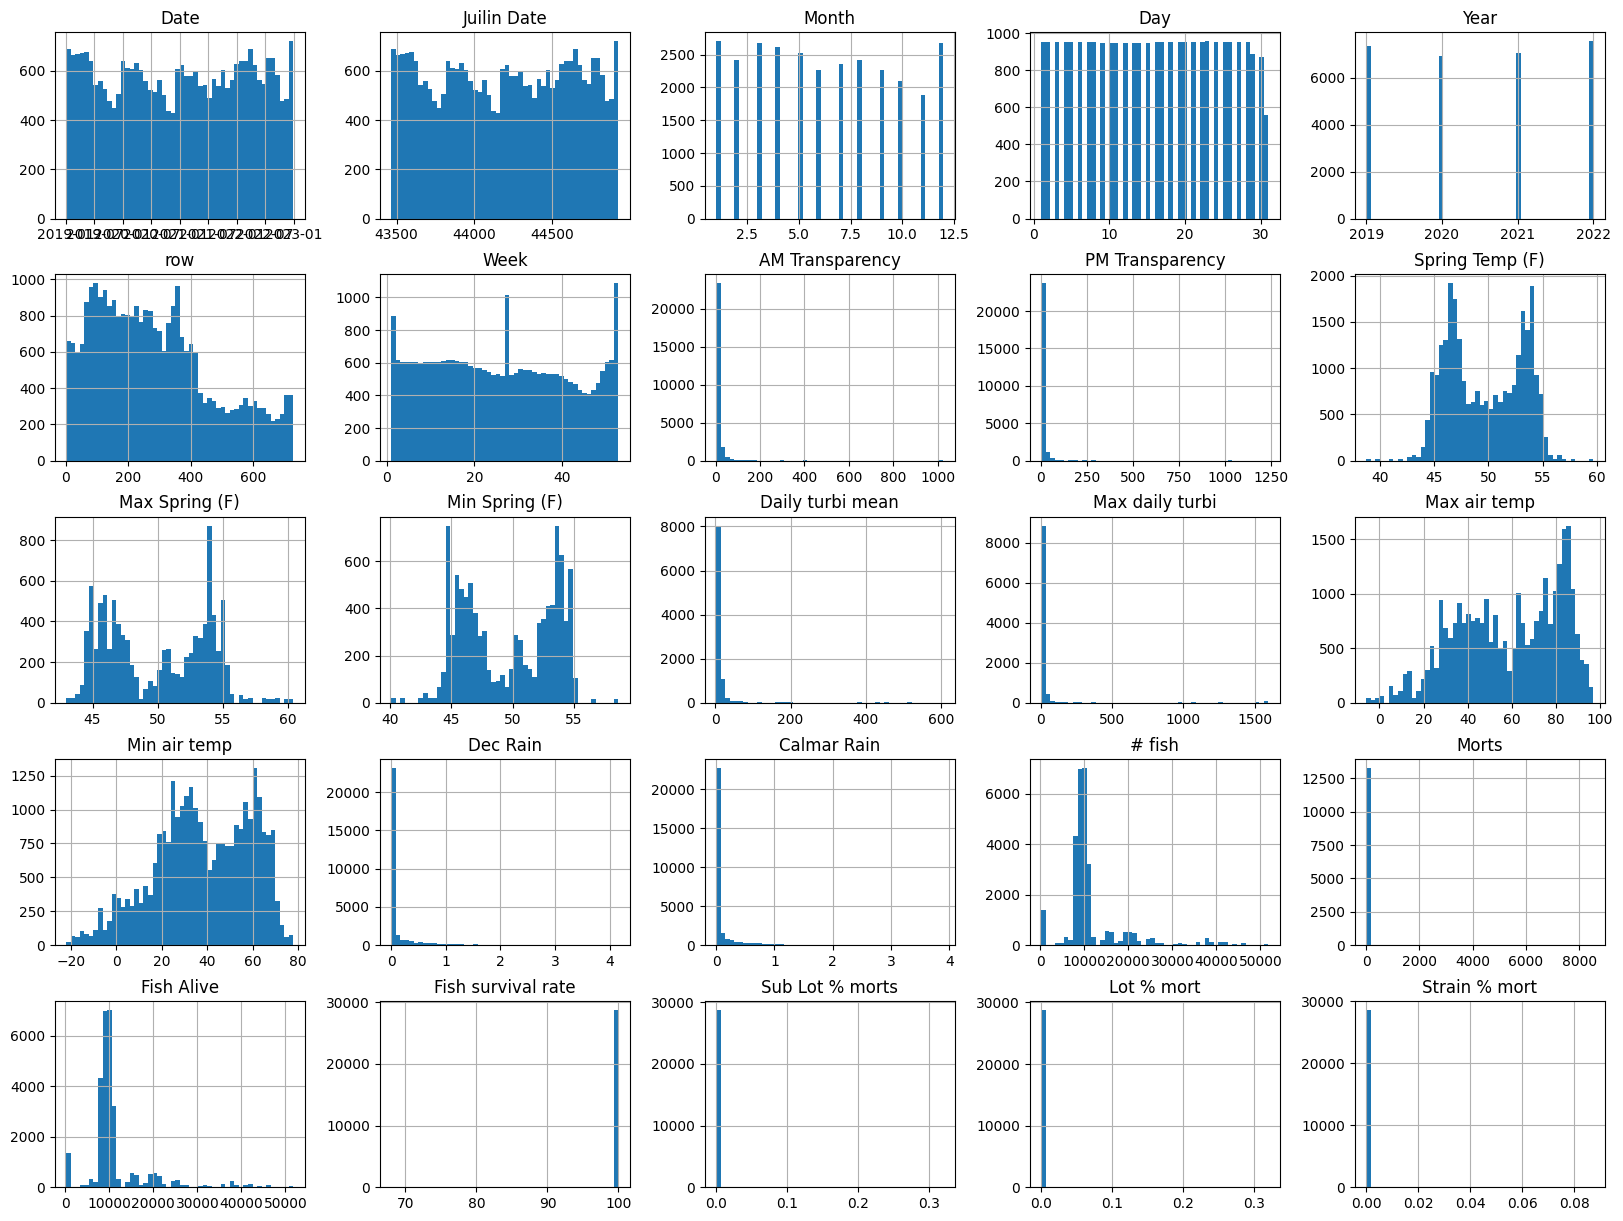

In [11]:
df.hist(figsize=(20, 15), bins=50)
plt.show()


### The data shows seasonal variations in temperature-related variables, with bimodal distributions indicating different seasonal clusters. Water quality metrics (e.g., turbidity, transparency) are right-skewed, meaning low values are common, but occasional spikes occur. Fish survival rates are generally high, with most mortality-related metrics remaining low, though some extreme cases exist. Rainfall is mostly low, with a few heavy-rain events. The time-based variables (date, month, day, year) appear uniformly distributed, suggesting consistent data collection over time.# Testing purpose

# *Looking for trends in Transparency and connections between Tranparency and Morts.*

In [12]:
fig = px.line(df, x="Date", y="AM Transparency", title="Tranaparency")
fig.show()

In [30]:
fig = px.line(df, x="Date", y="PM Transparency", title="Tranaparency")
fig.show()

In [13]:
# Convert Date column to datetime format (if not already done)
df["Date"] = pd.to_datetime(df["Date"])

# Define aggregation rules
agg_rules = {
    "AM Transparency": "mean",
    "PM Transparency": "mean",
    "Spring Temp (F)": "mean",
    "Daily turbi mean": "mean",
    "Max daily turbi": "mean",
    "Max air temp": "mean",
    "Min air temp": "mean",
    "Dec Rain": "sum",
    "Calmar Rain": "sum",
    "# fish": "sum",
    "Morts": "sum",
    "Fish Alive": "sum",
    "Fish survival rate": "mean"  # Avg survival rate per day
}

# Group data by Date and apply aggregation
df_grouped = df.groupby("Date").agg(agg_rules).reset_index()

df_grouped

,Date,AM Transparency,PM Transparency,Spring Temp (F),Daily turbi mean,Max daily turbi,Max air temp,Min air temp,Dec Rain,Calmar Rain,# fish,Morts,Fish Alive,Fish survival rate
0,2019-01-01,NaN,NaN,46.923000,NaN,NaN,31.0,12.0,0.23,0.00,221448,0.0,221448,100.000000
1,2019-01-02,NaN,NaN,46.923000,NaN,NaN,23.0,13.0,1.38,1.38,221448,9.0,221439,99.995882
2,2019-01-03,NaN,NaN,46.885500,NaN,NaN,37.0,13.0,0.00,0.00,221448,0.0,221448,100.000000
3,2019-01-04,NaN,NaN,46.818000,NaN,NaN,46.0,22.0,0.00,0.00,221448,9.0,221439,99.995768
4,2019-01-05,NaN,NaN,46.885500,NaN,NaN,49.0,21.0,0.00,0.00,221448,2.0,221446,99.999180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2022-12-27,4.338333,4.264167,46.633125,4.235382,4.68,22.0,-6.0,0.00,0.00,210759,58.0,210701,99.862819
1457,2022-12-28,3.804167,3.692500,46.580000,3.846458,4.50,40.0,10.0,0.00,0.00,210759,39.0,210720,99.983442
1458,2022-12-29,3.845833,3.690833,46.516250,3.831562,4.38,44.0,33.0,0.00,0.00,210759,1.0,210758,99.981061
1459,2022-12-30,4.905833,5.441667,46.354375,4.958924,5.72,43.0,19.0,0.00,0.00,210759,2.0,210757,99.962121


In [14]:
fig = px.line(df_grouped, x="Date", y="AM Transparency", title="AM Tranaparency")
fig.show()

In [15]:
fig = px.line(df_grouped, x="Date", y="PM Transparency", title="PM Tranaparency")
fig.show()

In [16]:
fig = px.line(df_grouped, x="Date", y="Morts", title="Morts")
fig.show()

In [20]:
df_grouped_Mrts = df_grouped.groupby("AM Transparency").agg({
    "Morts": "sum",  # Sum of fish deaths per transparency level
    "Fish Alive": "mean",  # Average number of fish alive per transparency level
    "Fish survival rate": "mean"  # Average survival rate
}).reset_index()

In [21]:
df_grouped_Mrts

,AM Transparency,Morts,Fish Alive,Fish survival rate
0,2.576667,4.0,192972.000000,99.977979
1,2.611667,21.0,192955.000000,99.970018
2,2.800833,0.0,192976.000000,100.000000
3,2.805000,20.0,192956.000000,99.990585
4,2.825833,25.0,192951.000000,99.967455
...,...,...,...,...
537,588.334291,3.0,253453.000000,99.999003
538,611.380000,0.0,240709.000000,100.000000
539,811.520000,61.0,248325.000000,99.926841
540,1024.927381,13.0,241869.666667,99.998138


In [22]:
fig = px.line(df_grouped_Mrts, x="AM Transparency", y="Morts", title="Morts")
fig.show()

In [26]:
df_grouped_Mrts_PM = df_grouped.groupby("PM Transparency").agg({
    "Morts": "sum",  # Sum of fish deaths per transparency level
    "Fish Alive": "mean",  # Average number of fish alive per transparency level
    "Fish survival rate": "mean"  # Average survival rate
}).reset_index()

In [27]:
df_grouped_Mrts_PM

,PM Transparency,Morts,Fish Alive,Fish survival rate
0,2.498333,21.0,192955.0,99.970018
1,2.657500,4.0,192972.0,99.977979
2,2.662500,25.0,192951.0,99.967455
3,2.707500,4.0,192972.0,99.957735
4,2.755000,20.0,192956.0,99.970038
...,...,...,...,...
545,318.558333,0.0,240709.0,100.000000
546,396.810387,0.0,221448.0,100.000000
547,407.400833,69.0,268320.0,99.966412
548,1024.927381,2.0,217319.0,99.999568


In [29]:
fig = px.line(df_grouped_Mrts_PM, x="PM Transparency", y="Morts", title="Morts")
fig.show()

# *Analysis of Transparency and Connections between Transparency and Morts*

### **Trends**
- **Low Transparency leads to more Morts in Fish** we see that in the graphs of AM and PM Transparency against the Morts
- 

